<div style="text-align: center;">
<FONT size="8">
<BR><BR><b>
Stochastic Processes: <BR><BR>Data Analysis and Computer Simulation  
</b>
</FONT>
<BR><BR><BR>

<FONT size="7">
<b>
Brownian motion 2: computer simulation
</b>
</FONT> 
<BR><BR><BR>

<FONT size="7">
<b>
-Making Animations-
</b>
</FONT>
<BR>
</div>

#### Note 1

- In the previous plot, we wrote and used a vary simple python code to simulate the motion of Brownian particles.
- Although the code is enough to produce trajectory data that can be used for later analysis, the strong graphic capability of the Jupyter notebook allows us to perform simulations with on-the-fly animations quite easily.
- Today, I will show you how to take advantage of this graphics capability by modifying our previous simulation code to display the results in real time.

# Simulation code with on-the-fly animation

## Import libraries

In [1]:
% matplotlib nbagg
import numpy as np # import numpy library as np
import matplotlib.pyplot as plt # import pyplot library as plt 
import matplotlib.mlab as mlab # import mlab module to use MATLAB commands with the same names
import matplotlib.animation as animation # import animation modules from matplotlib
from mpl_toolkits.mplot3d import Axes3D # import Axes3D from mpl_toolkits.mplot3d
plt.style.use('ggplot') # use "ggplot" style for graphs

#### Note 2

- As always, we begin by importing the necessary numerical and plotting libraries.
- Compared to the previous code example, we import two additional libraries, the `mlab` and `animation` modules from the `matplotlib` library.

## Define `init` function for `FuncAnimation`

In [2]:
def init():
    global R,V,W,Rs,Vs,Ws,time
    R[:,:] = 0.0 # initialize all the variables to zero
    V[:,:] = 0.0 # initialize all the variables to zero
    W[:,:] = 0.0 # initialize all the variables to zero
    Rs[:,:,:] = 0.0 # initialize all the variables to zero
    Vs[:,:,:] = 0.0 # initialize all the variables to zero
    Ws[:,:,:] = 0.0 # initialize all the variables to zero
    time[:]   = 0.0 # initialize all the variables to zero
    title.set_text(r'') # empty title
    line.set_data([],[]) # set line data to show the trajectory of particle n in 2d (x,y)
    line.set_3d_properties([]) # add z-data separately for 3d plot
    particles.set_data([],[]) # set position current (x,y) position data for all particles
    particles.set_3d_properties([]) # add current z data of particles to get 3d plot
    return particles,title,line # return listed objects that will be drawn by FuncAnimation

#### Note 3
- For this lesson, we will perform a simulation of Brownian particles and we wish to see how their positions evolve in time. In addition, we want to visualize the trajectory of one chosen particle, to see how it moves in space.
- The easiest way to animate your data in python is to use the "FuncAnimation" function provided by matplotlib.
- To use this, we must define two basic functions that tell the library how to update and animate our data.
- The first of these functions is "init". As its name implies, it is used to initialize the figure. 
- "init" will only be called once, at the beginning of the animation procedure.
- It should define the different objects or "artists" that will be drawn.
- Notice how we declare global variables explicitly in the function definition.
- This allows us to modify variables which are declared outside of the function.
- R,V,W will contain the current position,velocity and Wiener increment for each of the particles
- Rs,Vs,Ws the corresponding values for all time steps
- time will contain the time values.
- We initialize all the variables to zero
- We will define three different objects to draw, "particles", "line", and "title".
- "particles" is used to display the particles as points in 3d space
- "line" is used to display the trajectory of a given particle
- "title" is used to display the current time
- Here, the particles and line data are just empty arrays and time is set as an empty string.
- These three objects will be modified later, when we call the "animate" function

## Define `animate` function for `FuncAnimation`

In [3]:
def animate(i):
    global R,V,W,Rs,Vs,Ws,time # define global variables
    time[i]=i*dt # store time in each step in an array time
    W = std*np.random.randn(nump,dim) # generate an array of random forces accordingly to Eqs.(F10) and (F11)
    V = V*(1-zeta/m*dt)+W/m # update velocity via Eq.(F9)
    R = R+V*dt # update position via Eq.(F5)
    Rs[i,:,:]=R # accumulate particle positions at each step in an array Rs
    Vs[i,:,:]=V # accumulate particle velocitys at each step in an array Vs
    Ws[i,:,:]=W # accumulate random forces at each step in an array Ws
    title.set_text(r"t = "+str(time[i])) # set the title to display the current time
    line.set_data(Rs[:i+1,n,0],Rs[:i+1,n,1]) # set the line in 2D (x,y)
    line.set_3d_properties(Rs[:i+1,n,2]) # add z axis to set the line in 3D
    particles.set_data(R[:,0],R[:,1]) # set the current position of all the particles in 2d (x,y)
    particles.set_3d_properties(R[:,2]) # add z axis to set the particle in 3D
    return particles,title,line # return listed objects that will be drawn by FuncAnimation

#### Note 4

- The "animate" function is the main funciton used by "FuncAnimation". It is called at every step in order to update the figure and create the animation.
- Thus, the animate procedure should be responsible for performing the integration in time. It udpates the positions and velocities by propagating the solution to the Langevin equation over $\Delta t$. 
- After the updated configuration is found, we udpate the trajectory variables Rs,Vs,and Ws.
- Next, we udpate the objects in our animation.
- We set the title to display the current time
- We set the line, which displays the trajectory of particle n, to contain all the x,y, and z points until step i
- Finally, we set the current position of all the particles to be R
- It is important that animate, as well as init, return the objects that are redrawn (in this case particles, title, line)
- Notice how we used "n" even though it was not declared as global, this is because we never tried to modify the value, we only read it, but never tried to write to it.

## Set parameters and initialize variables

In [4]:
dim  = 3 # system dimension (x,y,z)
nump = 1000 # number of independent Brownian particles to simulate 
nums = 1024 # number of simulation steps
dt   = 0.05 # set time increment, \Delta t
zeta = 1.0 # set friction constant, \zeta
m    = 1.0 # set particle mass, m
kBT  = 1.0 # set temperatute, k_B T
std  = np.sqrt(2*kBT*zeta*dt) # calculate std for \Delta W via Eq.(F11)
np.random.seed(0) # initialize random number generator with a seed=0
R = np.zeros([nump,dim]) # array to store current positions and set initial condition Eq.(F12)
V = np.zeros([nump,dim]) # array to store current velocities and set initial condition Eq.(F12)
W = np.zeros([nump,dim]) # array to store current random forcces
Rs = np.zeros([nums,nump,dim]) # array to store positions at all steps
Vs = np.zeros([nums,nump,dim]) # array to store velocities at all steps
Ws = np.zeros([nums,nump,dim]) # array to store random forces at all steps
time = np.zeros([nums]) # an array to store time at all steps

#### Note 5

- Here, we define the parameters of our simulations.
- We will work in 3d, with 1000 particles.
- We use a time step of 0.05 and will simulate over a total of 1024 steps.
- We set the friction constant, mass, and thermal energy equal to one.
- We define the standard deviation of the Wiener process in order to satisfy the fluctuation dissipation theorem.
- Finally, we create the necessary arrays. R,V,W will store the current position, velocity, and Wiener updates for each of the 1000 particles.
- Rs,Vs,Ws will store the corresponding values for all 1024 time steps.
- and the time array will contain the time value for each step

## Perform and animate the simulation using `FuncAnimation` 

<IPython.core.display.Javascript object>


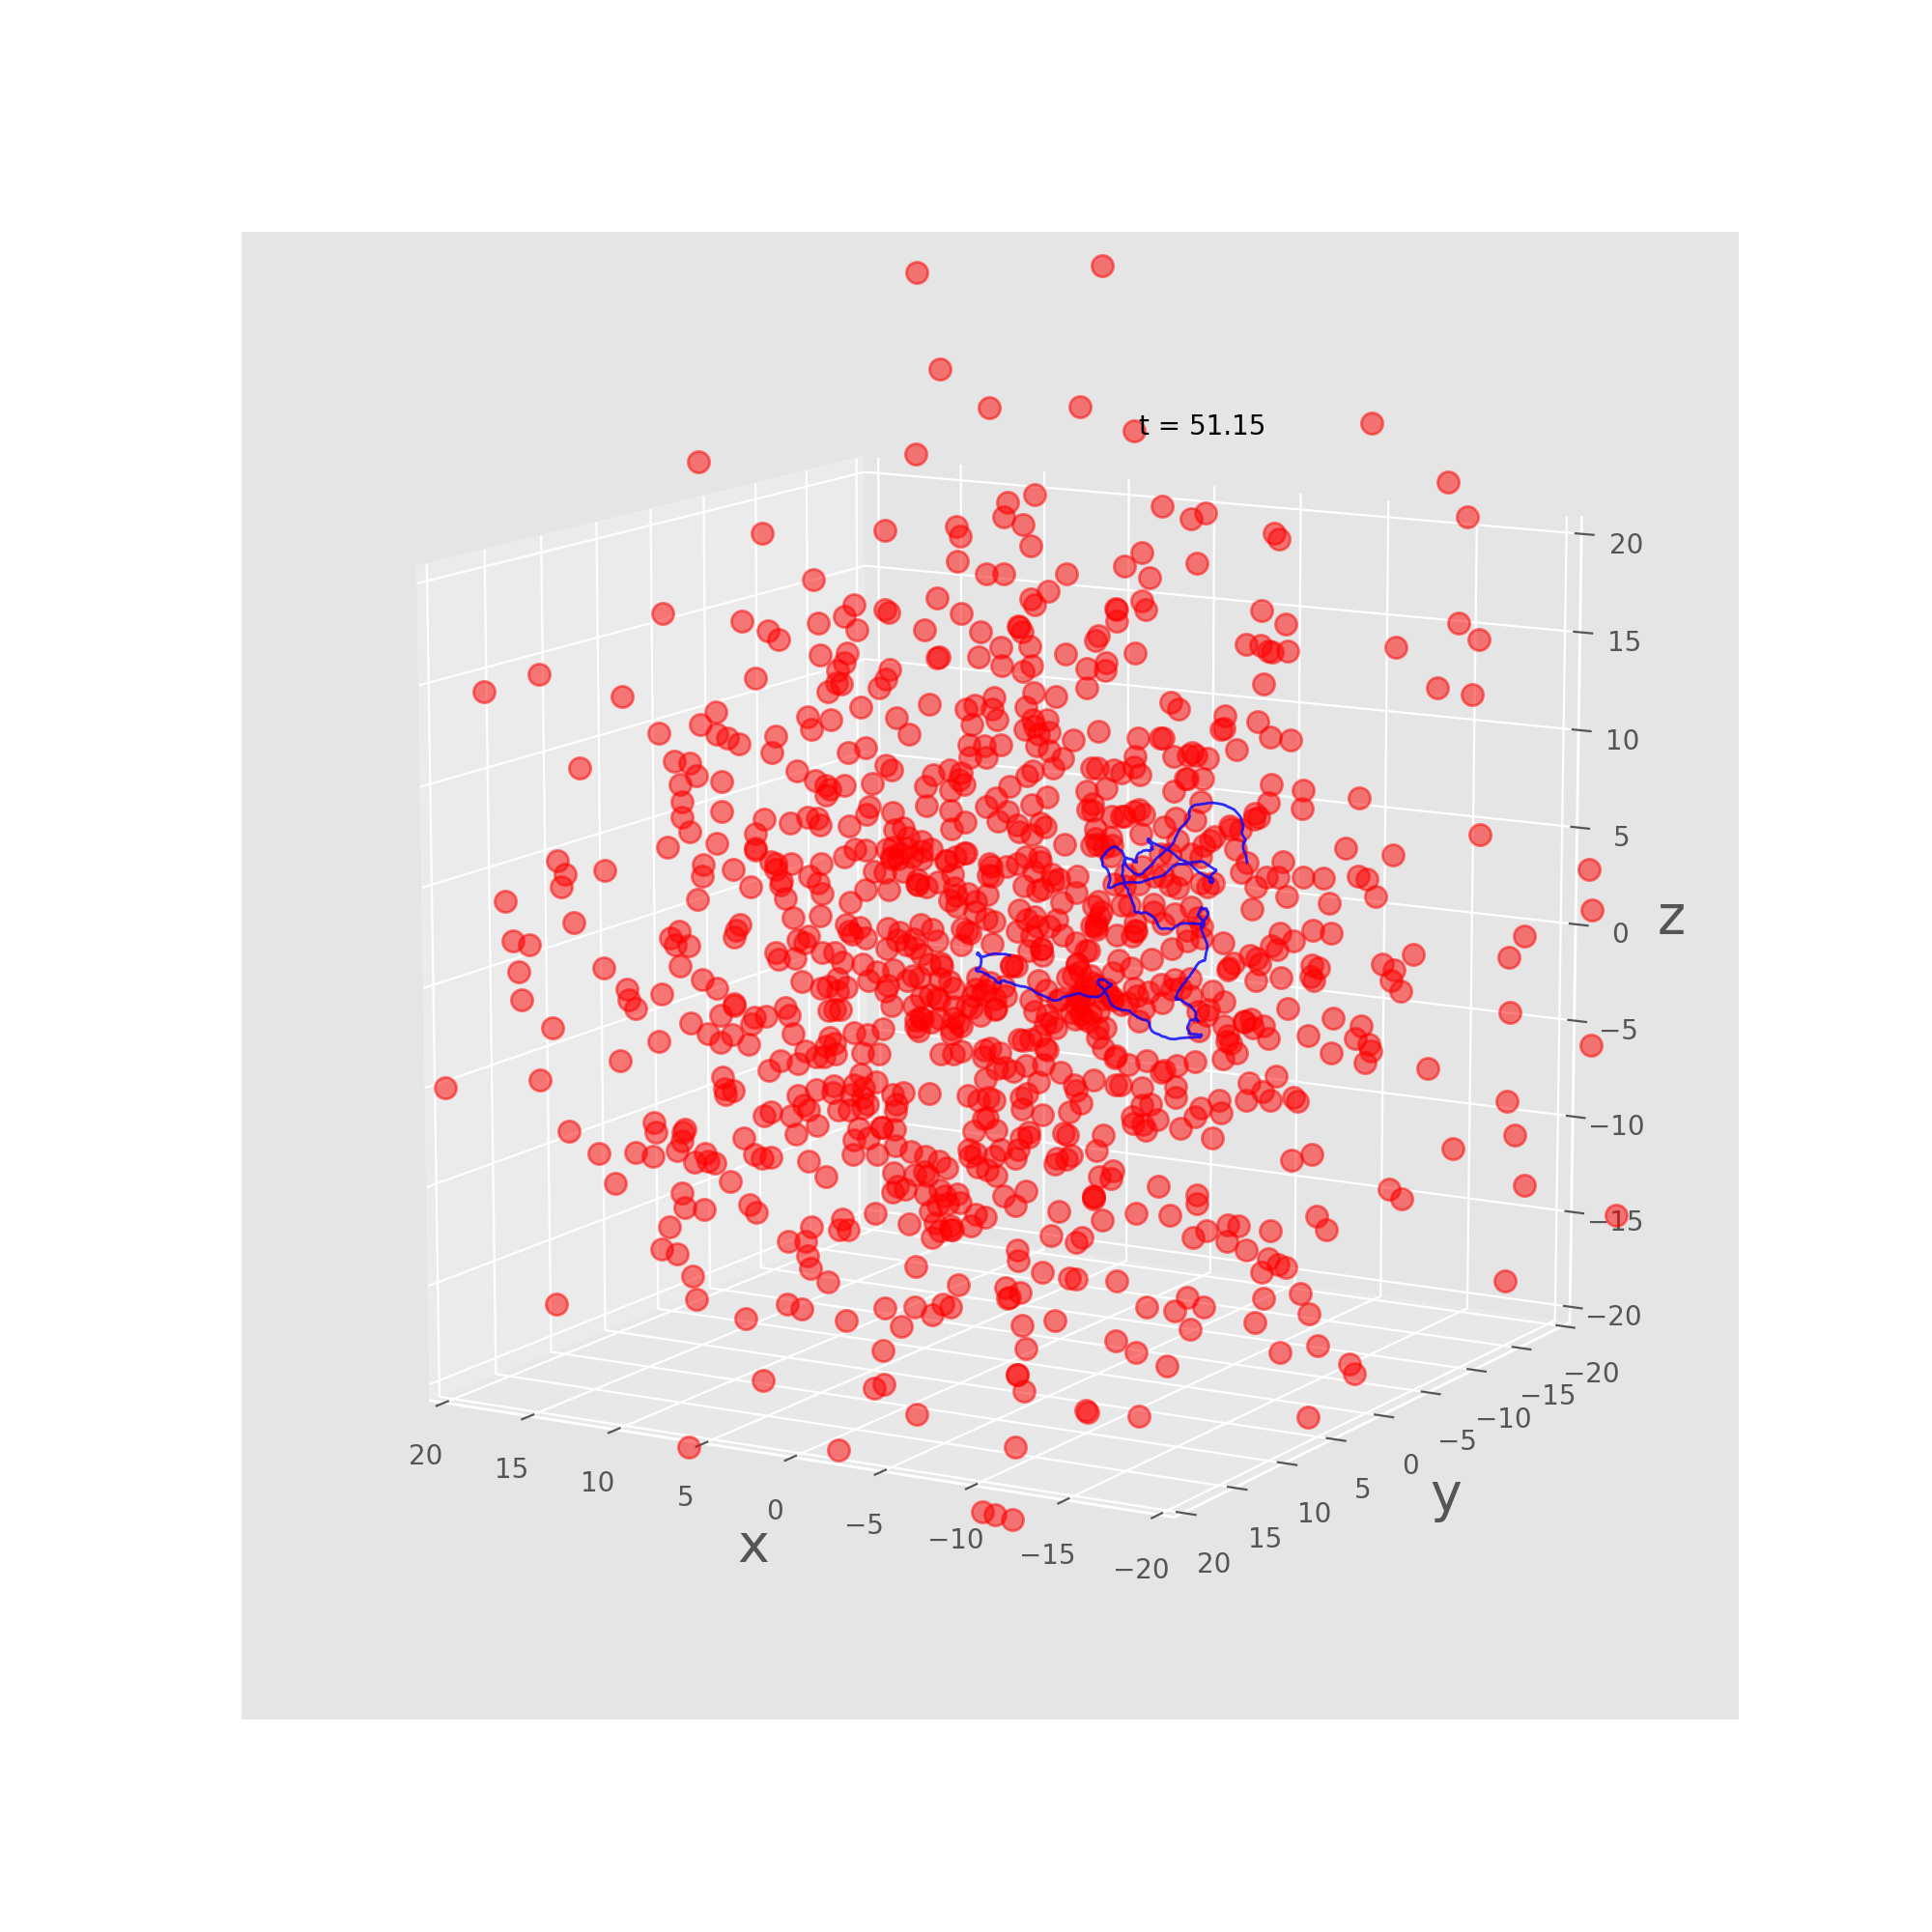

In [5]:
fig = plt.figure(figsize=(10,10)) # set fig with its size 10 x 10 inch
ax = fig.add_subplot(111,projection='3d') # creates an additional axis to the standard 2D axes
box = 40 # set draw area as box^3
ax.set_xlim(-box/2,box/2) # set x-range
ax.set_ylim(-box/2,box/2) # set y-range
ax.set_zlim(-box/2,box/2) # set z-range
ax.set_xlabel(r"x",fontsize=20) # set x-lavel
ax.set_ylabel(r"y",fontsize=20) # set y-lavel
ax.set_zlabel(r"z",fontsize=20) # set z-lavel
ax.view_init(elev=12,azim=120) # set view point
particles, = ax.plot([],[],[],'ro',ms=8,alpha=0.5) # define object particles
title = ax.text(-180.,0.,250.,r'',transform=ax.transAxes,va='center') # define object title
line, = ax.plot([],[],[],'b',lw=1,alpha=0.8) # define object line
n = 0 # trajectry line is plotted for the n-th particle
anim = animation.FuncAnimation(fig,func=animate,init_func=init,
            frames=nums,interval=5,blit=True,repeat=False)
## If you have ffmpeg installed on your machine 
## you can save the animation by uncomment the last line
## You may install ffmpeg by typing the following command in command prompt
## conda install -c menpo ffmpeg
## 
# anim.save('movie.mp4',fps=50,dpi=100)

#### Note 6

- Now we can run the simulation and visualize the results.
- First, we create a figure of size 10 inches by 10 inches, and we add an axis to this figure. 
- When we draw, we draw on the axis, not on the figure directly.
- Notice how the axis was explicitly set to be '3d'
- Next, we set the limits for each of the x,y, and z axis, as well as the labels.
- Using the view_init command we specify the initial position of the camera. However, this is not fixed, as you are able to pan and zoom by clicking on the figure.
- The main code here is to create the empy objects or "artist" that will later be updated by the animate function.
- These are particles, title, and line, which are all set to be empty. Notice however, that we specify how these objects will be drawn. That is, we can specify the line or marker type, as well as the color. These parameters will be used throughout the simulation, even though the underlying data will change as the particle positions change.
- Finally, we call the "FuncAnimation" function and specify where to draw (fig), how to initialize (init), and how to update the animation (animate). We must also specify how many frames, or steps to take. 
- Initially, all the particles are set to be at the origin. Notice how this droplet starts expanding radially outward.
- This is basically how a drop of ink will diffuse through a container of water if given enough time.

## Homework

- Perform a simulation for a single Brownian particle (nump=1) and plot its trajectory on a x-y, x-z, and y-z planes.

- Compare the present results with the previous results obtained by the simple simulation code. 
